# Tarea 07: Modelaje de sistemas físicos



Teniendo métodos numéricos para EDOs, podemos modelar distintos sistemas físicos.
Para hacerlo, puedes utilizar o los métodos que has implementado, o utilizar un paquete de Julia ya desarrollado (y muy poderoso), `DifferentialEquations.jl`.

## DifferentialEquations.jl

**[1]** (i) Instala el paquete. 

(ii) Lee las instrucciones y anota si algo no te queda claro.

(iii) Escribe un breve resumen de cómo se utilizan las funciones del paquete y qué tipo de objeto regresan, usando un ejemplo sencillo, por ejemplo, el péndulo simple.

(iv) Escribe un pedazo de la documentación que no hayas entendido de forma más claro. (Puede ser en español.)

In [2]:
Pkg.add("DifferentialEquations")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DifferentialEquations
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [4]:
using DifferentialEquations

INFO: Precompiling module DiffEqBase.
INFO: Precompiling module DiffEqPDEBase.
INFO: Precompiling module StochasticDiffEq.
INFO: Precompiling module FiniteElementDiffEq.
INFO: Precompiling module DiffEqDevTools.
INFO: Precompiling module OrdinaryDiffEq.
INFO: Precompiling module StokesDiffEq.
INFO: Precompiling module DiffEqParamEstim.
INFO: Precompiling module DiffEqSensitivity.
INFO: Precompiling module Sundials.
INFO: Precompiling module SymEngine.
INFO: Precompiling module DelayDiffEq.
INFO: Precompiling module DiffEqCallbacks.
INFO: Precompiling module DiffEqMonteCarlo.
INFO: Precompiling module DiffEqJump.
INFO: Precompiling module DiffEqFinancial.


Para resolver ecuaciones diferenciales de primer ordinarias.
Teniendo la ecuación 
$$\frac{du}{dt} = f(t, u)$$

Por ejemplo, en un intervalo de tiempo $t$ en $[0,1]$, donde la función $f$ con parámetros $t$ y $u$, es $f(t, u) = \alpha u$.

Analíticamente, la solución de esta ecuación es 
$$u(t) = u_0 exp(\alpha t)$$

Para resolverla utilizando la paquetería:


**using** DifferentialEquations

$\alpha = 1$      *aquí definimos la constante $\alpha$*

$u_0 = 1/2$      *aquí definimos $u_0$*

$f(t, u) = \alpha * u$ *aquí definimos la función*

$tspan = (0.0, 1.0)$ *aquí definimos el intervalo de tiempo, en este caso de tipo Float64 (ambos deben ser del mismo tipo)*

$prob = ODEProblem(f, u_0, tspan)$ *aquí se define la ecuación diferencial*

$sol = solve(prob)$ *aquí se resuelve la ecuación diferencial y nos da un resultado del mismo tipo que tspan*

$plot(sol)$ *aquí graficamos de solución*

La ecuación de movimiento que describe un péndulo simple es:
    $$\ddot{\theta}l + g sin\theta = 0 $$
Reacomodando,
    $$\ddot{\theta} + \frac{g}{l} sin\theta = 0 $$
Para ángulos pequeños, $sin\theta = \theta$, entonces se obtiene una ecuación diferencial de segundo orden,
$$\ddot{\theta} + \frac{g}{l} \theta = 0$$
Se hace un cambio de variable $y = \dot{\theta}$ y $\dot{y} = k sin\theta$


In [38]:
function péndulo_simple(θ, t)
    return [θ[2], sin(θ[1])]
end

péndulo_simple (generic function with 1 method)

In [42]:
u0 = [0.0, π/10]
k = 1.0
tspan = [0.0, 10.0]
prob = ODEProblem(péndulo_simple, u0, tspan)
sol = solve(prob)

LoadError: MethodError: Cannot `convert` an object of type Array{Float64,1} to an object of type Tuple{Float64,Float64}
This may have arisen from a call to the constructor Tuple{Float64,Float64}(...),
since type constructors fall back to convert methods.

### Atractor de Lorenz

**[2]** (i) Encuentra las **ecuaciones de Lorenz** (¡no Lorentz!), que provee un modelo (o, más bien, una caricatura) de la dinámica de la atmósfera.

(ii) Intégralos y dibuja trayectorias largas en 2D y 3D con distintos colores. ¿Qué observas? [Para dibujar en 3D, se puede utilizar `plot3D` de PyPlot.] Hazlo animado y/o interactivo.

(iii) Toma dos trayectorias con condiciones iniciales *muy* cercanas. ¿Cómo varía la distancia entre ellas en el tiempo (para tiempos suficientemente cortos)? -- calcúlalo numéricamente Dibújalos en colores diferentes. Llamamos un sistema con este tipo de comportamiento *caótico*.

Las ecuaciones de Lorenz son:
$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = x (\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

In [ ]:
function EcLorenz(tf, x0, y0, z0, σ = 10.0, ρ = 28.0, β = 2.66)
    f(t, u) = [u[5], u[6], u[7], u[8]] 
    u0 = [x0, y0, z0]
    tspan = (0.0, tf)
    prob = ODEProblem(f, u0, tspan)
    sol = solve(prob)
end

### Dinámica de $N$ cuerpos

**[3]** Gran parte de la dinámica clásica se originó en el estudio de los cuerpos celestes. 

(i) Considera un sistema de dos cuerpos con una interacción gravitacional. ¿Cuáles variables necesitas? Escribe las ecuaciones diferenciales cuidadosamente y escribe la función $\mathbf{f}$ correspondiente de Julia para el sistema $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$.

(ii) Resuelve las ecuaciones numéricamente para dos masas iguales. ¿Ocurre lo que debería ocurrir? Haz una animación de la dinámica.

(iii) Cambia una de las dos masas. ¿Ahora qué pasa? 

(iv) Cambia al sistema de coordenadas del centro de masa. ¿Qué ocurre?

(iv) ¿Qué ocurre si una de las dos masas es mucho más grande?

Constantes:
- Masas
- G

Variables:
- Posiciones
- Velocidades

Para dos cuerpos, las ecuaciones son las siguientes:

$$F = G \frac{  m_2  (x_2 - x_1)}{m_1  (\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}^3}$$

$$F = G \frac{  m_2  (y_2 - y_1)}{m_1  (\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}^3}$$

$$F = G \frac{  m_1  (x_2 - x_1)}{m_2  (\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}^3}$$

$$F = G \frac{  m_1  (y_2 - y_1)}{m_2  (\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}^3}$$

In [30]:
uu=[1,2,3]
gg(u) = u[1]*4
ff(u) = [u[3],u[2],gg(u)]
ff(uu)

3-element Array{Int64,1}:
 3
 2
 4

In [25]:
function dos_cuerpos(m1, m2, x1, y1, x2, y2, v1x, v1y, v2x, v2y, tf)
    G = 1
    f(t, u) = [u[5], u[6], u[7], u[8], 
        G * m2 * (u[3] - u[1]) / (m1 * (sqrt((u[3] - u[1])^2 + (u[4] - u[2])^2))^3), 
        G * m2 * (u[4] - u[2]) / (m1 * (sqrt((u[3] - u[1])^2 + (u[4] - u[2])^2))^3), 
        G * m1 * (u[1] - u[3]) / (m2 * (sqrt((u[3] - u[1])^2 + (u[4] - u[2])^2))^3), 
        G * m1 * (u[2] - u[4]) / (m2 * (sqrt((u[3] - u[1])^2 + (u[4] - u[2])^2))^3)]
    u0 = [x1, y1, x2, y2, v1x, v1y, v2x, v2y]
    tspan = (0.0, tf)
    prob = ODEProblem(f, u0, tspan)
    sol = solve(prob)
end

dos_cuerpos (generic function with 1 method)

In [47]:
sol1 = dos_cuerpos(1.0, 1.0, 1.0, 5.0, 2.0, 4.0, 1.0, 3.0, 0.7, 0.5, 100.0)

DiffEqBase.ODESolution{Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,false,#f#3{Float64,Float64,Int64},DiffEqBase.CallbackSet{Tuple{},Tuple{}}},OrdinaryDiffEq.Tsit5,OrdinaryDiffEq.InterpolationData{#f#3{Float64,Float64,Int64},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}}(Array{Float64,1}[[1.0,5.0,2.0,4.0,1.0,3.0,0.7,0.5],[1.1061,5.31131,2.07137,4.05406,1.03074,2.96495,0.669257,0.535046],[1.33016,5.93682,2.20969,4.17462,1.06701,2.90695,0.632986,0.593047],[1.63636,6.75347,2.38579,4.35094,1.0884,2.85381,0.611597,0.646187],[2.06634,7.86436,2.62339,4.6145,1.09947,2.8078,0.600529,0.6922],[2.67352,9.39973,2.95269,5.00716,1.10389,2.77012,0.596114,0.729885],[3.54565,11.5741,3.42297,5.59656,1.10453,2.74013,0.59547,0.759866],[4.81182,14.7021,4.10656,6.48281,1.1033,2.71693,0.596702,0.783071],[6.67244,19.2717,5.11548,7.82112,1.


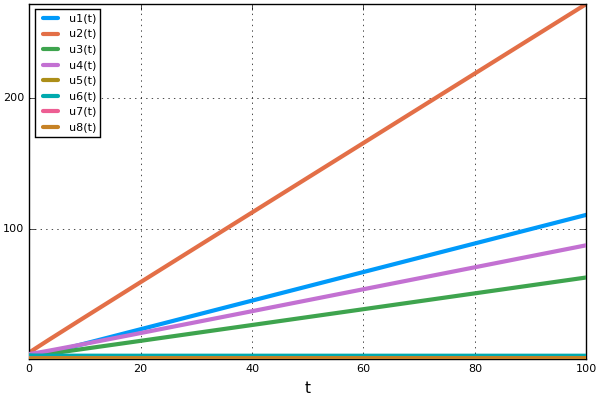

In [48]:
#Gráfica de 2 cuerpos de masas iguales
plot(sol1)

In [36]:
sol = dos_cuerpos(5.0, 5.0, 2.0, 1.0, 2.0, 5.0, 0.2, 0.1, 0.1, 0.2, 100.0)

DiffEqBase.ODESolution{Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,false,#f#3{Float64,Float64,Int64},DiffEqBase.CallbackSet{Tuple{},Tuple{}}},OrdinaryDiffEq.Tsit5,OrdinaryDiffEq.InterpolationData{#f#3{Float64,Float64,Int64},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}}(Array{Float64,1}[[2.0,1.0,2.0,5.0,0.2,0.1,0.1,0.2],[2.02637,1.01373,2.01319,5.02583,0.199987,0.108215,0.100013,0.191785],[2.17615,1.11219,2.08834,5.15229,0.19941,0.154325,0.10059,0.145675],[2.42869,1.35909,2.21817,5.28778,0.196418,0.233775,0.103582,0.0662249],[2.71774,1.7857,2.37848,5.31051,0.1885,0.339514,0.1115,-0.039514],[3.0488,2.58195,2.60602,5.07287,0.161399,0.53757,0.138601,-0.23757],[3.17818,3.14405,2.74673,4.78086,0.11738,0.737301,0.18262,-0.437301],[3.21303,3.43826,2.82066,4.59542,0.0675393,0.902903,0.232461,-0.602903],[3.2208,3.67158,2.8

In [18]:
using Plots
pyplot()

INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/FixedSizeArrays.ji for module FixedSizeArrays.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/PlotThemes.ji for module PlotThemes.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/Showoff.ji for module Showoff.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/FileIO.ji for module FileIO.
INFO: Recompiling stale cache file /Users/Yuriko/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


Plots.PyPlotBackend()


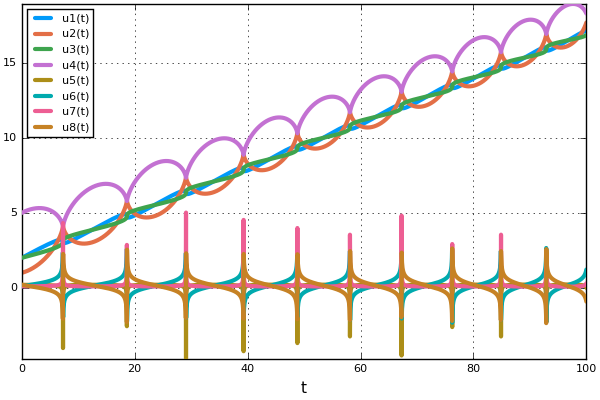

In [37]:
#Gráfica de masas iguales y diferentes posiciones y velocidades 
plot(sol)

In [53]:
sol2 = dos_cuerpos(2.0, 35.0, 1.0, 6.0, 2.0, 4.0, 0.2, 0.1, 0.1, 0.2, 100.0)

DiffEqBase.ODESolution{Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,false,#f#3{Float64,Float64,Int64},DiffEqBase.CallbackSet{Tuple{},Tuple{}}},OrdinaryDiffEq.Tsit5,OrdinaryDiffEq.InterpolationData{#f#3{Float64,Float64,Int64},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}}(Array{Float64,1}[[1.0,6.0,2.0,4.0,0.2,0.1,0.1,0.2],[1.01529,6.0002,2.00615,4.01233,0.296808,-0.0939162,0.0996839,0.200633],[1.0594,5.96868,2.01745,4.03521,0.480874,-0.464287,0.0990829,0.201843],[1.16814,5.83619,2.03442,4.07013,0.791656,-1.09467,0.0980681,0.203901],[1.38999,5.49455,2.05526,4.11416,1.32236,-2.18617,0.0963351,0.207465],[1.68299,4.98209,2.07175,4.15056,2.20644,-4.04878,0.0934484,0.213547],[1.83933,4.68829,2.07739,4.16377,3.0316,-5.84009,0.0907539,0.219396],[1.95249,4.46553,2.08026,4.17095,4.22753,-8.5358,0.0868489,0.228199],[2.01936,4.


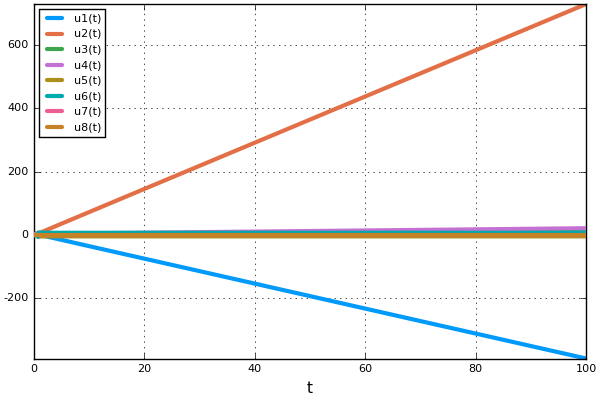

In [54]:
#Gráfica de masas diferentes con distintas posiciones y velocidades pequeñas
plot(sol2)

**[4]**

(i) Haz lo mismo para 3 cuerpos. 

(ii) De este sistema, existen soluciones especiales llamadas *coreografías* (choreographies), en las cuales las masas se siguen la una a la otra. Busca las condiciones iniciales adecuadas e integra las ecuaciones. Haz una animación.

(iii) En el problema restringida de 3 cuerpos, una de las masas es tan pequeña que no influye a las otras dos. ¿Cómo puedes resolver esto numéricamente? ¿Qué observas? ¡Hazlo interactivo!

**[5]** ** (Opcional) ¿Cómo puedes hacer una simulación de $N$ cuerpos, donde $N$ es un parámetro que puedes variar? ¡Hazlo!